In [1]:
import pandas as pd
import os
import time
import keras_ocr
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import string
from random import randrange
import cv2

In [2]:
def draw_random_subdir(dataDir):
    directory_list = os.listdir(dataDir)
    directory = directory_list[randrange(len(directory_list))]
    subdirectory_list = os.listdir(dataDir + directory + '/')
    subdirectory = subdirectory_list[randrange(len(subdirectory_list))]
    image_list = os.listdir(dataDir + directory + '/'+subdirectory+'/')
    image = image_list[randrange(len(image_list))]    
    return directory, subdirectory, image

In [3]:
dataDir = 'L:/DATA/ISIS/raw_upload_20230421/'
directory, subdirectory, image = draw_random_subdir(dataDir)
img = keras_ocr.tools.read(dataDir + directory + '/' + subdirectory + '/' + image)

In [4]:
alpha=1.8
beta=-50
new_img = alpha*img + beta
name = 'L:/DATA/ISIS/keras_ocr/test_images/testing/'+directory+'_'+subdirectory+'_'+image+'_'+str(alpha)+'_'+str(beta)+'.png'
cv2.imwrite(name, new_img)

True

In [5]:
# generate multiple images to test
new_img = keras_ocr.tools.read(name)
y = new_img.shape[0]
h = int(y*0.15)
x = new_img.shape[1]
crop_img = img[y-h:y, 0:x]
crop_new_img = new_img[y-h:y, 0:x]

from PIL import Image
# Open input image in grayscale mode and get its pixels.
pil_img = Image.open(name).convert("LA")
width, height = pil_img.size
pil_img_crop = pil_img.crop((0,int(height*0.85),width,height))

# Change the colors
black = (0,0,0)
white = (255,255,255)
threshold = (100,100,100)

pixels = pil_img_crop.getdata()

newPixels = []

# Compare each pixel 
for pixel in pixels:
    if pixel > threshold:
        newPixels.append(black)
    else:
        newPixels.append(white)

# Create and save new image.
new_pil_img_crop = Image.new("RGB",pil_img_crop.size)
new_pil_img_crop.putdata(newPixels)

import numpy as np
# generate text predictions from the images
new_pil_img_crop = np.array(new_pil_img_crop)

In [6]:
detector = keras_ocr.detection.Detector()
alphabet = string.digits
recognizer = keras_ocr.recognition.Recognizer(alphabet=alphabet)
#recognizer.model.load_weights('L:/DATA/ISIS/keras_ocr/ISIS_reading.h5')
recognizer.model.load_weights('L:/DATA/ISIS/keras_ocr/ISIS_reading_contrast.h5')
recognizer.compile()
pipeline = keras_ocr.pipeline.Pipeline(detector=detector, recognizer=recognizer)

Looking for C:\Users\mfortier\.keras-ocr\craft_mlt_25k.h5
Provided alphabet does not match pretrained alphabet. Using backbone weights only.
Looking for C:\Users\mfortier\.keras-ocr\crnn_kurapan_notop.h5


In [7]:
# Predictions
all_img = [crop_img, crop_new_img, new_pil_img_crop]
prediction_groups = pipeline.recognize(all_img)

1/1 [==============================] - 3s 3s/step


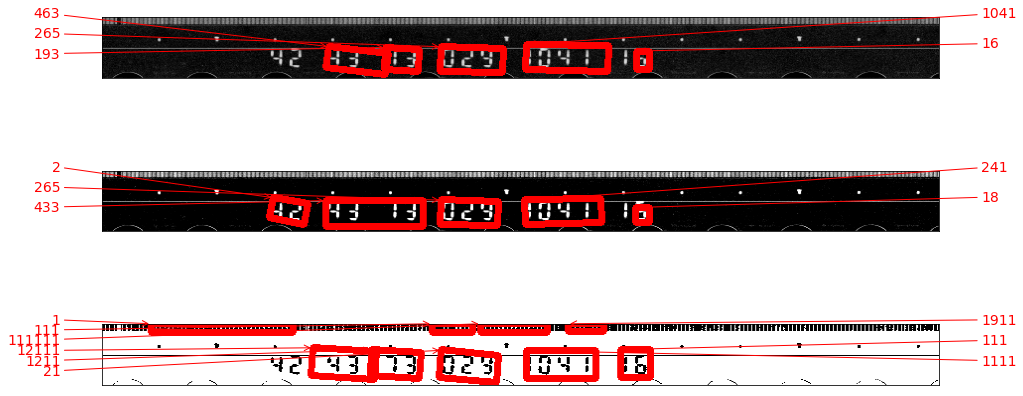

In [8]:
# plot the text predictions
fig, axs = plt.subplots(nrows=len(all_img), figsize=(15, 8))
for ax, iono, predictions in zip(axs, all_img, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=iono, 
                                    predictions=predictions, 
                                    ax=ax)

In [9]:
numbers = list(zip(*predictions))[0]
numbers

('1', '111', '111111', '1911', '12111', '111', '1111', '1211', '21')

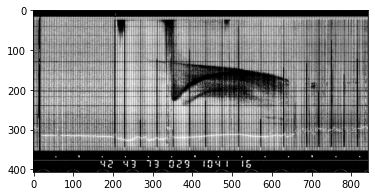

In [10]:
plt.imshow(plt.imread(name))

In [11]:
# PERFECT
# R014207848_B1-35-7 ISIS A C-1544_Image0416.png_1.8_-50